# Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('data/creditcard.csv')

In [3]:
# Check for NaN samples
print(f"There are {df.isna().sum().sum()} null samples.")
df = df.dropna()

There are 0 null samples.


## Exploratory data analysis

### Visualising and clarifying the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We see that the dataset has a huge number (284807) of datapoints. This can reduce the accessibility of models with are not memory efficient, e.g., KNN.

In [5]:
df["Label"] = df.Class.map({1: "Fraud", 0: "Not fraud"})

We replace the ambiguous `Class` column with a new `Label` column for clearer labeling of fraud.

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Label
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,Not fraud
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,Not fraud
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,Not fraud
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,Not fraud
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,Not fraud


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


### Balance in the dataset

In [8]:
num_fraud = df[df.Label == "Fraud"].shape[0]
num_total = df.shape[0]

print(f"Total number of entries = {num_total}")
print(f"Total number of frauds = {num_fraud}")
print(f"Percentage of frauds = {num_fraud / num_total * 100:.5f}%")

Total number of entries = 284807
Total number of frauds = 492
Percentage of frauds = 0.17275%


This shows that the dataset is highly imbalanced, with only 0.17% of the transactions being fraudulent.

### Analysing the transaction times

Text(0.5, 1.0, 'Distribution of transaction times')

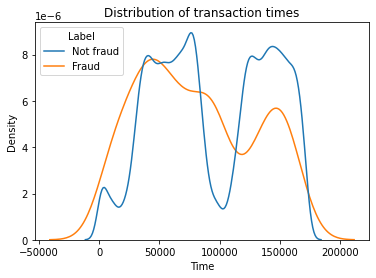

In [9]:
sns.kdeplot(data=df, x="Time", hue="Label", common_norm=False)
plt.title("Distribution of transaction times")

The `Time` column does not have any apparent pattern that we can work with, and can thus be safely dropped.

In [10]:
df = df.drop(["Time"], axis=1)

### Analysing the transaction amounts

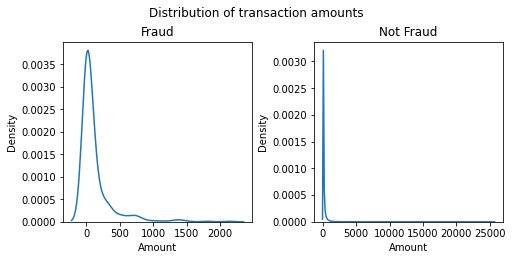

Max transaction amount = 25691.16
Max fraudulent amount = 2125.87


In [11]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3.5), constrained_layout=True)

sns.kdeplot(data=df[df.Label == "Fraud"], x="Amount", ax=axs[0])
axs[0].set_title("Fraud")

sns.kdeplot(data=df[df.Label != "Fraud"], x="Amount", ax=axs[1])
axs[1].set_title("Not Fraud")

fig.suptitle("Distribution of transaction amounts")
plt.show()

max_amount = df.Amount.max()
max_fraud = df[df.Label == "Fraud"].Amount.max()
print(f"Max transaction amount = {max_amount}")
print(f"Max fraudulent amount = {max_fraud}")

This shows that the transaction amounts are highly skewed towards the left, with most of them lying close to zero.

Further, the maximum amount among the fraudulent transactions is much less than the other transactions, with the former being around one-tenth of the latter.

### Analysing the (principal) components

Finally, we compare the distributions of fraud and non-fraud transactions for each (PCA) component, as provided in the dataset. This replaces the usual pair plot, as
1. It is time-consuming and computationally intensive to plot a $28\times28$ pair plot, and
2. Since they are specified to be the principal components, we know they are uncorrelated with each other.

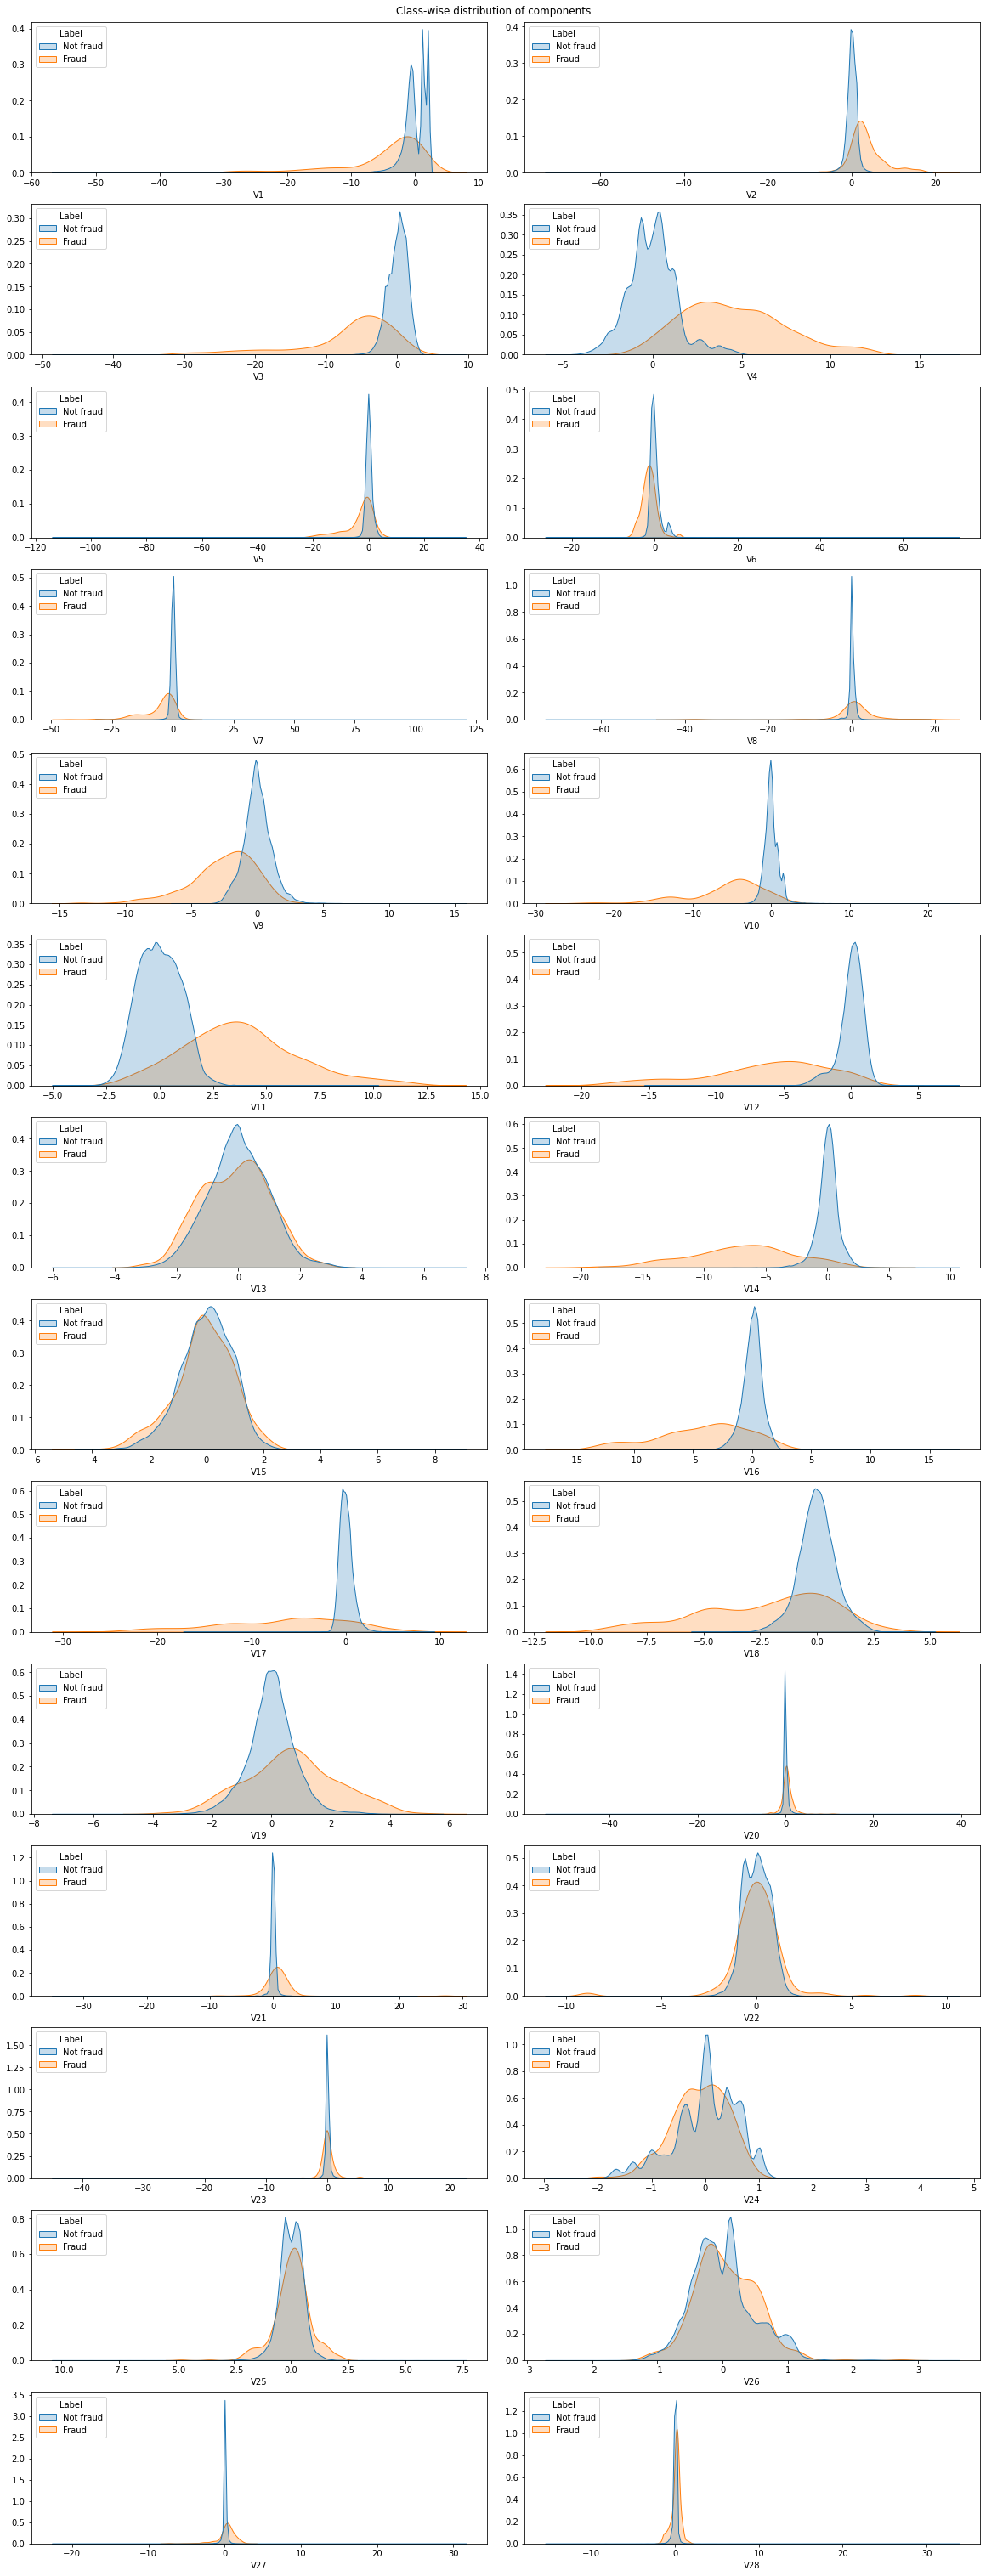

In [12]:
N = 28 # number of components V1...V28
fig, axs = plt.subplots(int(N/2), 2, figsize=(8*2, 3*N/2), constrained_layout=True)

for n in range(N):
    sns.kdeplot(data=df, x=f"V{n+1}", hue="Label",  fill=True, common_norm=False, ax=axs[int(n/2)][n%2])
    axs[int(n/2)][n%2].set_xlabel(f'V{n+1}')
    axs[int(n/2)][n%2].set_ylabel('')
    sns.move_legend(axs[int(n/2)][n%2], "upper left")

fig.suptitle("Class-wise distribution of components")
plt.show()

## Data preprocessing

### Train-test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop(['Label', 'Class'], axis=1)
y = df.Class

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Feature scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

We need to scale the columns to prevent unncessary bias in the model. Since PCA components are already scaled, we scale only the `Amount` column.

In [17]:
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])

### Handling skewness

Many ML models work better with normally distributed features, as skewness in data can give biased results. We use `PowerTransformer` to reduce skewness.

In [18]:
from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

In [19]:
X_train = PT.fit_transform(X_train)
X_test = PT.fit_transform(X_test)

## Logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

# metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

# cross-validation
from sklearn.model_selection import KFold, GridSearchCV

### Hyperparameter tuning

In [21]:
kf = KFold(n_splits=5, shuffle=False)
# the KFold object above mimics the default behaviour of the GridSearchCV object; explicit declaration allows us to control shuffle and random_state, which we do not perform here.
C_grid = {'C': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]}

lr_cv = GridSearchCV(estimator=LR, param_grid=C_grid, scoring='roc_auc', cv=kf, verbose=3, return_train_score=True)
lr_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END .......C=0.001;, score=(train=0.981, test=0.980) total time=   0.5s
[CV 2/5] END .......C=0.001;, score=(train=0.986, test=0.966) total time=   0.4s
[CV 3/5] END .......C=0.001;, score=(train=0.983, test=0.975) total time=   0.8s
[CV 4/5] END .......C=0.001;, score=(train=0.981, test=0.986) total time=   0.5s
[CV 5/5] END .......C=0.001;, score=(train=0.981, test=0.988) total time=   0.4s
[CV 1/5] END ........C=0.01;, score=(train=0.986, test=0.981) total time=   0.7s
[CV 2/5] END ........C=0.01;, score=(train=0.992, test=0.965) total time=   0.5s
[CV 3/5] END ........C=0.01;, score=(train=0.986, test=0.983) total time=   0.6s
[CV 4/5] END ........C=0.01;, score=(train=0.985, test=0.991) total time=   0.7s
[CV 5/5] END ........C=0.01;, score=(train=0.986, test=0.988) total time=   0.5s
[CV 1/5] END .........C=0.1;, score=(train=0.986, test=0.982) total time=   1.1s
[CV 2/5] END .........C=0.1;, score=(train=0.993,

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0]},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [22]:
lr_cv_df = pd.DataFrame(lr_cv.cv_results_)
lr_cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.480493,0.159897,0.026008,0.007397,0.001,{'C': 0.001},0.980142,0.966200,0.974624,0.985885,...,0.978895,0.007824,7,0.980940,0.985896,0.982671,0.981178,0.981133,0.982363,0.001872
1,0.575153,0.083793,0.026059,0.005093,0.01,{'C': 0.01},0.980691,0.965422,0.983281,0.991420,...,0.981862,0.009045,1,0.986134,0.992288,0.986198,0.985409,0.985833,0.987172,0.002573
2,0.926905,0.148111,0.030878,0.008371,0.1,{'C': 0.1},0.982205,0.959758,0.985265,0.993273,...,0.980891,0.011226,2,0.985973,0.992604,0.984554,0.984491,0.986231,0.986770,0.003002
3,0.832596,0.136583,0.021413,0.003254,1,{'C': 1},0.982161,0.957717,0.985161,0.993194,...,0.980028,0.011879,3,0.985426,0.992308,0.983669,0.983828,0.986012,0.986249,0.003161
4,0.765330,0.046655,0.022620,0.002654,10.0,{'C': 10.0},0.982134,0.957478,0.985132,0.993167,...,0.979909,0.011951,4,0.985353,0.992264,0.983546,0.983741,0.985978,0.986176,0.003182
5,0.731846,0.072620,0.020234,0.002479,100.0,{'C': 100.0},0.982134,0.957448,0.985127,0.993165,...,0.979896,0.011960,5,0.985345,0.992259,0.983533,0.983731,0.985973,0.986168,0.003184
6,0.902601,0.155140,0.025365,0.003556,1000.0,{'C': 1000.0},0.982133,0.957445,0.985126,0.993164,...,0.979894,0.011961,6,0.985344,0.992258,0.983532,0.983730,0.985974,0.986167,0.003184


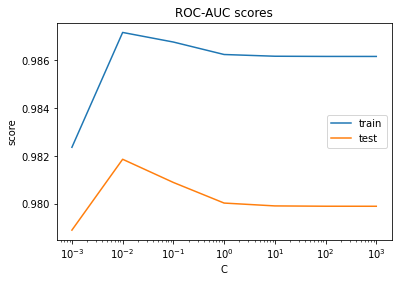

In [23]:
plt.figure()
plt.xscale('log')

sns.lineplot(data=lr_cv_df, x='param_C', y='mean_train_score', label='train')
sns.lineplot(data=lr_cv_df, x='param_C', y='mean_test_score', label='test')

plt.xlabel('C')
plt.ylabel('score')
plt.title('ROC-AUC scores')
plt.legend()
plt.show()

In [24]:
best_score = lr_cv.best_score_
best_C = lr_cv.best_params_['C']

print(f"The highest test ROC_AUC is {best_score:.8f} at C = {best_C}")

The highest test ROC_AUC is 0.98186208 at C = 0.01


### Optimal logistic regression

In [25]:
best_LR = LogisticRegression(C=best_C)
best_LR.fit(X_train, y_train)

LogisticRegression(C=0.01)

#### Predictions on train data

In [26]:
y_train_pred = best_LR.predict(X_train)

In [27]:
confusion = confusion_matrix(y_train, y_train_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_train, y_train_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_train, y_train_pred))

Accuracy =  0.9992325595393351
Precision =  0.9063829787234042
Recall = 0.6191860465116279
F1-score = 0.7357512953367875


In [28]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.91      0.62      0.74       344

    accuracy                           1.00    199364
   macro avg       0.95      0.81      0.87    199364
weighted avg       1.00      1.00      1.00    199364



It is important to note that accuracy is not a very reliable metric of performance due to heavy class imbalance in the data (blindly predicting as "not fraud" would earn an accuracy of over 99%).

#### ROC-AUC on train data

In [29]:
def show_ROC(y, scores):
  fpr, tpr, thresholds = metrics.roc_curve(y, scores)
  auc_score = metrics.roc_auc_score(y, scores)

  plt.figure()
  plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.5f})")
  plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (Recall)')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()

  return auc_score

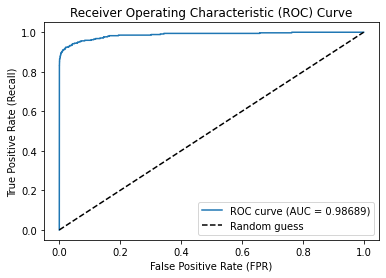

AUC-score on train data =  0.9868940365932604


In [30]:
y_train_pred_proba = best_LR.predict_proba(X_train)[:, 1]
AUC_score = show_ROC(y_train, y_train_pred_proba)
print("AUC-score on train data = ", AUC_score)

We get a very good AUC score of 0.98689 on train data.

#### Predictions on test data

In [31]:
y_test_pred = best_LR.predict(X_test)

In [32]:
confusion = confusion_matrix(y_test, y_test_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision = ", TP / (TP + FP))
print("Recall", TP / (TP + FN))
print("F1-score", metrics.f1_score(y_test, y_test_pred))

Accuracy =  0.999133925541004
Precision =  0.8627450980392157
Recall 0.5945945945945946
F1-score 0.7040000000000001


In [33]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.59      0.70       148

    accuracy                           1.00     85443
   macro avg       0.93      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443



#### ROC-AUC on test data

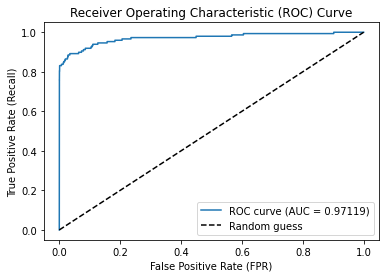

AUC-score on test data =  0.9711854565157807


In [34]:
y_test_pred_proba = best_LR.predict_proba(X_test)[:, 1]
AUC_score = show_ROC(y_test, y_test_pred_proba)
print("AUC-score on test data = ", AUC_score)

Similarly, we get a very good AUC score of 0.97119 on test data, which is close to 1.

## XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
  max_depth=2, n_estimators=250,
  scale_pos_weight = ((num_total-num_fraud) / num_fraud))
# the last parameter takes care of class imbalance

### Hyperparameter tuning

In [36]:
param_grid = {'learning_rate': [0.2, 0.3, 0.4, 0.5, 0.6], 'subsample': [0.6, 0.7, 0.8, 0.9]}

xgb_cv = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=3, return_train_score=True)
xgb_cv.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END learning_rate=0.2, subsample=0.6;, score=(train=1.000, test=0.970) total time=   1.5s
[CV 2/3] END learning_rate=0.2, subsample=0.6;, score=(train=1.000, test=0.980) total time=   1.2s
[CV 3/3] END learning_rate=0.2, subsample=0.6;, score=(train=1.000, test=0.981) total time=   1.4s
[CV 1/3] END learning_rate=0.2, subsample=0.7;, score=(train=1.000, test=0.974) total time=   1.2s
[CV 2/3] END learning_rate=0.2, subsample=0.7;, score=(train=1.000, test=0.980) total time=   1.1s
[CV 3/3] END learning_rate=0.2, subsample=0.7;, score=(train=1.000, test=0.981) total time=   1.1s
[CV 1/3] END learning_rate=0.2, subsample=0.8;, score=(train=1.000, test=0.975) total time=   1.0s
[CV 2/3] END learning_rate=0.2, subsample=0.8;, score=(train=1.000, test=0.978) total time=   1.1s
[CV 3/3] END learning_rate=0.2, subsample=0.8;, score=(train=1.000, test=0.978) total time=   1.2s
[CV 1/3] END learning_rate=0.2, subsample=0.9;, 

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=250,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.2, 0.3, 0.4, 0.5, 0.6],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [37]:
xgb_cv_df = pd.DataFrame(xgb_cv.cv_results_)
xgb_cv_df.sample(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
11,1.021648,0.032607,0.052623,0.001246,0.4,0.9,"{'learning_rate': 0.4, 'subsample': 0.9}",0.975679,0.978955,0.977886,0.977507,0.001364,8,1.000000,1.000000,1.000000,1.000000,0.000000
7,1.078034,0.098222,0.053744,0.001803,0.3,0.9,"{'learning_rate': 0.3, 'subsample': 0.9}",0.980668,0.980563,0.978526,0.979919,0.000986,1,0.999987,0.999995,0.999996,0.999993,0.000004
3,1.006280,0.031077,0.053094,0.000878,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.978066,0.981316,0.979069,0.979483,0.001359,2,0.999954,0.999977,0.999981,0.999971,0.000012
13,1.048547,0.099433,0.064402,0.014697,0.5,0.7,"{'learning_rate': 0.5, 'subsample': 0.7}",0.968789,0.979068,0.976764,0.974874,0.004404,15,1.000000,1.000000,1.000000,1.000000,0.000000
4,1.071441,0.042200,0.054071,0.001033,0.3,0.6,"{'learning_rate': 0.3, 'subsample': 0.6}",0.969519,0.983835,0.979875,0.977743,0.006036,6,0.999987,0.999998,0.999994,0.999993,0.000004


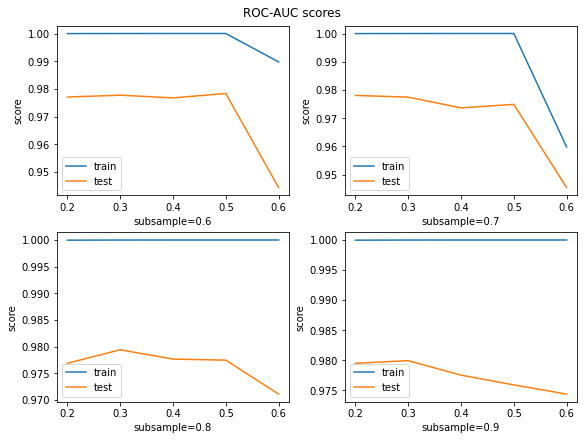

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), constrained_layout=True)

for n in range(4):
  subsample = param_grid['subsample'][n]
  temp_df = xgb_cv_df[xgb_cv_df.param_subsample == subsample]
  sns.lineplot(data=temp_df, x='param_learning_rate', y='mean_train_score', label='train', ax=axs[int(n/2)][n%2])
  sns.lineplot(data=temp_df, x='param_learning_rate', y='mean_test_score', label='test', ax=axs[int(n/2)][n%2])
  axs[int(n/2)][n%2].set_xlabel("learning rate")
  axs[int(n/2)][n%2].set_ylabel("score")
  axs[int(n/2)][n%2].set_xlabel(f"subsample={subsample}")
  axs[int(n/2)][n%2].legend()

fig.suptitle("ROC-AUC scores")
plt.show()

In [39]:
best_lr, best_ss = xgb_cv.best_params_.values()
best_xgb_score = xgb_cv.best_score_

print(f"The highest test ROC_AUC is {best_xgb_score:.8f} at subsample = {best_ss} and learning rate = {best_lr}")

The highest test ROC_AUC is 0.97991923 at subsample = 0.9 and learning rate = 0.3


### Optimal XGBoost

In [40]:
best_XGB = XGBClassifier(
  max_depth=2, n_estimators=250,
  scale_pos_weight = ((num_total-num_fraud) / num_fraud),
  subsample=best_ss, learning_rate=best_lr,
  objective='binary:logistic')
# binary:logistic: logistic regression for binary classification, output probability
best_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=None, num_parallel_tree=None, ...)

#### Predictions on train data

In [41]:
y_train_pred = best_XGB.predict(X_train)

In [42]:
confusion = confusion_matrix(y_train, y_train_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_train, y_train_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_train, y_train_pred))

Accuracy =  0.9994331975682671
Precision =  0.7527352297592997
Recall = 1.0
F1-score = 0.8589263420724095


In [43]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.75      1.00      0.86       344

    accuracy                           1.00    199364
   macro avg       0.88      1.00      0.93    199364
weighted avg       1.00      1.00      1.00    199364



#### ROC-AUC on train data

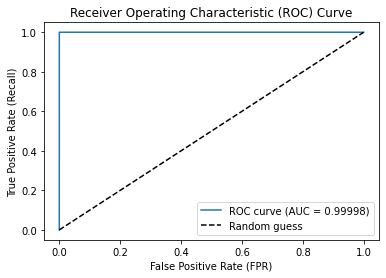

AUC-score on train data =  0.9999759577744904


In [44]:
y_train_pred_proba = best_XGB.predict_proba(X_train)[:, 1]
AUC_score = show_ROC(y_train, y_train_pred_proba)
print("AUC-score on train data = ", AUC_score)

We get a very good AUC score of 0.99997 on train data.

#### Predictions on test data

In [45]:
y_test_pred = best_XGB.predict(X_test)

In [46]:
confusion = confusion_matrix(y_test, y_test_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision = ", TP / (TP + FP))
print("Recall", TP / (TP + FN))
print("F1-score", metrics.f1_score(y_test, y_test_pred))

Accuracy =  0.9987828142738434
Precision =  0.6122448979591837
Recall 0.8108108108108109
F1-score 0.6976744186046512


In [47]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.61      0.81      0.70       148

    accuracy                           1.00     85443
   macro avg       0.81      0.90      0.85     85443
weighted avg       1.00      1.00      1.00     85443



#### ROC-AUC on test data

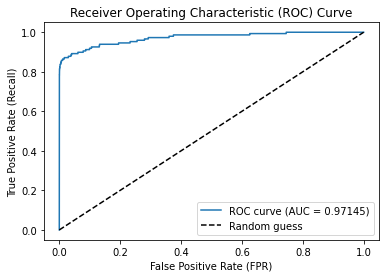

AUC-score on test data =  0.9714451276412704


In [48]:
y_test_pred_proba = best_XGB.predict_proba(X_test)[:, 1]
AUC_score = show_ROC(y_test, y_test_pred_proba)
print("AUC-score on test data = ", AUC_score)

Similarly, we get a very good AUC score of 0.97144 on test data, which is close to 1.

## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

### Hyperparameter tuning

In [50]:
from time import time
start_time = time()

temp_rf = RandomForestClassifier(n_estimators=100, max_depth=25, min_samples_split=25, min_samples_leaf=25, max_features='sqrt', bootstrap=True, n_jobs=-1, class_weight='balanced')
temp_rf.fit(X_train, y_train)

end_time = time()
print(f"Time taken = {end_time - start_time} seconds.")

Time taken = 23.102439165115356 seconds.


Running one `RandomForest` model with roughly average parameter values takes ~23 seconds. This makes it difficult to perform extensive hyperparameter tuning (with grid search cross-validation) as for earlier models.

We shall use randomised search as an approximate workaround.

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [52]:
param_dist = {
    'n_estimators': randint(100, 250),
    'max_depth': [None, 10, 30, 50],
    'min_samples_split': randint(15, 30),
    'min_samples_leaf': randint(15, 30),
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(bootstrap=True, class_weight='balanced', n_jobs=-1)
rf_cv = RandomizedSearchCV(
  estimator=rf, param_distributions=param_dist, 
  n_iter=10, scoring='roc_auc', cv=3, n_jobs=-1, 
  verbose=3, return_train_score=True)
rf_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 2/3] END max_depth=10, max_features=log2, min_samples_leaf=23, min_samples_split=21, n_estimators=108;, score=(train=1.000, test=0.981) total time= 1.6min
[CV 1/3] END max_depth=10, max_features=log2, min_samples_leaf=23, min_samples_split=21, n_estimators=108;, score=(train=1.000, test=0.968) total time= 1.7min
[CV 3/3] END max_depth=10, max_features=log2, min_samples_leaf=23, min_samples_split=21, n_estimators=108;, score=(train=1.000, test=0.966) total time= 1.8min
[CV 2/3] END max_depth=50, max_features=log2, min_samples_leaf=19, min_samples_split=17, n_estimators=169;, score=(train=1.000, test=0.983) total time= 2.6min
[CV 1/3] END max_depth=50, max_features=log2, min_samples_leaf=19, min_samples_split=17, n_estimators=169;, score=(train=1.000, test=0.966) total time= 2.6min
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=27, min_samples_split=24, n_estimators=196;, score=(train=1.000, test=0.983) tota

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 30, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x30cb5a9b0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x30cb5a230>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x30cb59ab0>},
                   return_train_score=True, scoring='roc_auc', verbose=3)

In [53]:
best_params = rf_cv.best_params_
best_rf_score = rf_cv.best_score_

print(f"The highest test ROC_AUC is {best_rf_score:.8f} at params being {best_params}")

The highest test ROC_AUC is 0.97774839 at params being {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 24, 'min_samples_split': 16, 'n_estimators': 194}


### Optimal random forest

In [55]:
best_RF = RandomForestClassifier(bootstrap=True, class_weight='balanced', n_jobs=-1, **best_params)
best_RF.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=24, min_samples_split=16,
                       n_estimators=194, n_jobs=-1)

#### Predictions on train data

In [56]:
y_train_pred = best_RF.predict(X_train)

In [57]:
confusion = confusion_matrix(y_train, y_train_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_train, y_train_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_train, y_train_pred))

Accuracy =  0.9995535803856263
Precision =  0.8014184397163121
Recall = 0.9854651162790697
F1-score = 0.8839634941329858


In [58]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.80      0.99      0.88       344

    accuracy                           1.00    199364
   macro avg       0.90      0.99      0.94    199364
weighted avg       1.00      1.00      1.00    199364



#### ROC-AUC on train data

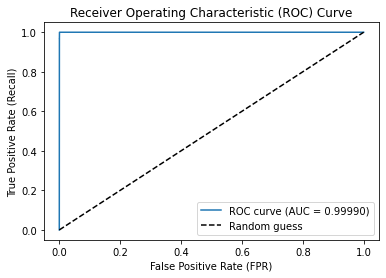

AUC-score on train data =  0.9999007491358821


In [59]:
y_train_pred_proba = best_RF.predict_proba(X_train)[:, 1]
AUC_score = show_ROC(y_train, y_train_pred_proba)
print("AUC-score on train data = ", AUC_score)

We get a very good AUC score of 0.99989 on train data.

#### Predictions on test data

In [60]:
y_test_pred = best_RF.predict(X_test)

In [61]:
confusion = confusion_matrix(y_test, y_test_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision = ", TP / (TP + FP))
print("Recall", TP / (TP + FN))
print("F1-score", metrics.f1_score(y_test, y_test_pred))

Accuracy =  0.9991222218320986
Precision =  0.718562874251497
Recall 0.8108108108108109
F1-score 0.761904761904762


In [62]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.72      0.81      0.76       148

    accuracy                           1.00     85443
   macro avg       0.86      0.91      0.88     85443
weighted avg       1.00      1.00      1.00     85443



#### ROC-AUC on test data

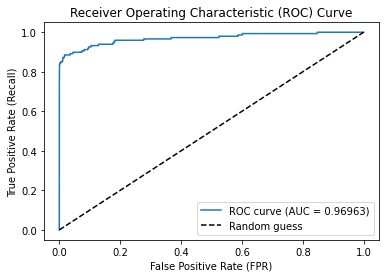

AUC-score on test data =  0.9696332917711662


In [63]:
y_test_pred_proba = best_RF.predict_proba(X_test)[:, 1]
AUC_score = show_ROC(y_test, y_test_pred_proba)
print("AUC-score on test data = ", AUC_score)

Similarly, we get a very good AUC score of 0.96963 on test data, which is close to 1.

## Best model from preliminary analysis

Thus, we see that XGBoost is the best model (with AUC score of 0.97144) among the three tested above, with the baseline logistic regression model following a close second.

It is important to note that this is somewhat biased and highly subject to hyperparameter tuning and the grid considered for search. This bias is further presented in the Random Forest, where we perform a randomised search over a large grid.

We proceed with XGBoost and logistic regression models for further analysis, as they generally take lesser time and resources than Random Forest, as seen above.